<h1 style="color:orange" align='center'>Customer Experience Prediction </h1>

<h3 style="color:orange" align='center'>We have customer data of TELCO company with several features.Now, because lots of customers are leaving this company, so as part of customer retention program we need to predict customer churn before they decide to leave. In order to do that we need to use this data and create machine learning model for customer churn prediction. </h3>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50)
df=pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### We have 7043 records with 21 different features including customer id and churn

In [2]:
type(df.shape)

tuple

#### Most of the columns are object type, but for developing model we need numeric values and some label encoding as well, so now we will change datatype of some columns and change string values to numeric values by encoding them.

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
def changeColumnsToString(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsNames:
        df[col]=df[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changeColumnsToString(df)

df['SeniorCitizen']=df['SeniorCitizen'].astype(bool)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [5]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,False,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,False,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,False,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,False,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


<h3 style="color:orange" align='center'>There are some categorical values which can be encoded as numbers, so we will take a look at unique values present as categories and convert these fields as category and encode them.</h3>

In [6]:
print("Payment methods: ",df.PaymentMethod.unique())
print("Contract types: ",df.Contract.unique())
print("Gender: ",df.gender.unique())
print("Senior Citizen: ",df.SeniorCitizen.unique())
print("Internet Service Types: ",df.InternetService.unique())

Payment methods:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract types:  ['Month-to-month' 'One year' 'Two year']
Gender:  ['Female' 'Male']
Senior Citizen:  [False  True]
Internet Service Types:  ['DSL' 'Fiber optic' 'No']


In [7]:
df['gender']=df['gender'].astype('category')
df['PaymentMethod']=df['PaymentMethod'].astype('category')
df['Contract']=df['Contract'].astype('category')
df['SeniorCitizen']=df['SeniorCitizen'].astype('category')
df['InternetService']=df['InternetService'].astype('category')
df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService     category
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

#### Here we have encoded fields with numbers by pandas build-in get_dummies method, and using that method we need to give prefix for new fields which will be generated.
#### This method will generate new fields with prefix and category name as column name and 0 or 1 will be their value.
#### As we can see below, we got all the new fields with values as 0 or 1.

In [8]:
dfPaymentDummies = pd.get_dummies(df['PaymentMethod'], prefix = 'payment')
dfContractDummies = pd.get_dummies(df['Contract'], prefix = 'contract')
dfGenderDummies = pd.get_dummies(df['gender'], prefix = 'gender')
dfSeniorCitizenDummies = pd.get_dummies(df['SeniorCitizen'], prefix = 'SC')
dfInternetServiceDummies = pd.get_dummies(df['InternetService'], prefix = 'IS')

print(dfPaymentDummies.head(3))
print(dfContractDummies.head(3))
print(dfGenderDummies.head(3))
print(dfSeniorCitizenDummies.head(3))
print(dfInternetServiceDummies.head(3))

   payment_Bank transfer (automatic)  payment_Credit card (automatic)  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   

   payment_Electronic check  payment_Mailed check  
0                         1                     0  
1                         0                     1  
2                         0                     1  
   contract_Month-to-month  contract_One year  contract_Two year
0                        1                  0                  0
1                        0                  1                  0
2                        1                  0                  0
   gender_Female  gender_Male
0              1            0
1              0            1
2              0            1
   SC_False  SC_True
0         1        0
1         1        0
2         1        0
   IS_DSL  IS_Fiber optic  IS_No
0 

#### Now we have new dataframes by label encoding, so we will concat them with our existing dataframe, but before that we will remove category fields as we don't need them right!

In [9]:
df.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService'], axis=1, inplace=True)

df = pd.concat([df, dfPaymentDummies], axis=1)
df = pd.concat([df, dfContractDummies], axis=1)
df = pd.concat([df, dfGenderDummies], axis=1)
df = pd.concat([df, dfSeniorCitizenDummies], axis=1)
df = pd.concat([df, dfInternetServiceDummies], axis=1)
df.head()

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check,contract_Month-to-month,contract_One year,contract_Two year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0
2,3668-QPYBK,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0
3,7795-CFOCW,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0
4,9237-HQITU,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0


#### For a bit of simplicity, we'll rename some column names

In [10]:
df.columns = ['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No']

#### We'll convert all fields to number type in dataframe for our model.
#### Here we are wrapping up data preparation phase.
#### Here we are removing the attritubes which are directly co related to each other.

In [11]:
numericColumns=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No'])

for columnName in numericColumns:
    df[columnName]=pd.to_numeric(df[columnName],errors='coerce')
df.drop(['gender_Female','SC_False','contract_Two_year','payment_Credit_card_auto','IS_DSL'], axis=1, inplace=True)
df.dtypes

customerID                     object
Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
MonthlyCharges                float64
TotalCharges                  float64
Churn                           int64
payment_Bank_transfer_auto      uint8
payment_Electronic_check        uint8
payment_Mailed_check            uint8
contract_Month_to_month         uint8
contract_One_year               uint8
gender_Male                     uint8
SC_True                         uint8
IS_Fiber_optic                  uint8
IS_No                           uint8
dtype: object

#### We'll save our model data to new csv file without customerID, as we won't be using that in our model development.

In [12]:
modelData = df.loc[:, df.columns != 'customerID']
modelData.to_csv('modelData.csv')

<h2 style="color:orange" align='center'>Model Development</h2>
<h4 style="color:orange" align='center'>After reading our model data, we'll take our training and target data in numpy arrays. Here we drew heatmap to find relation between various attributes and make our data more clean and efficient. </h4>

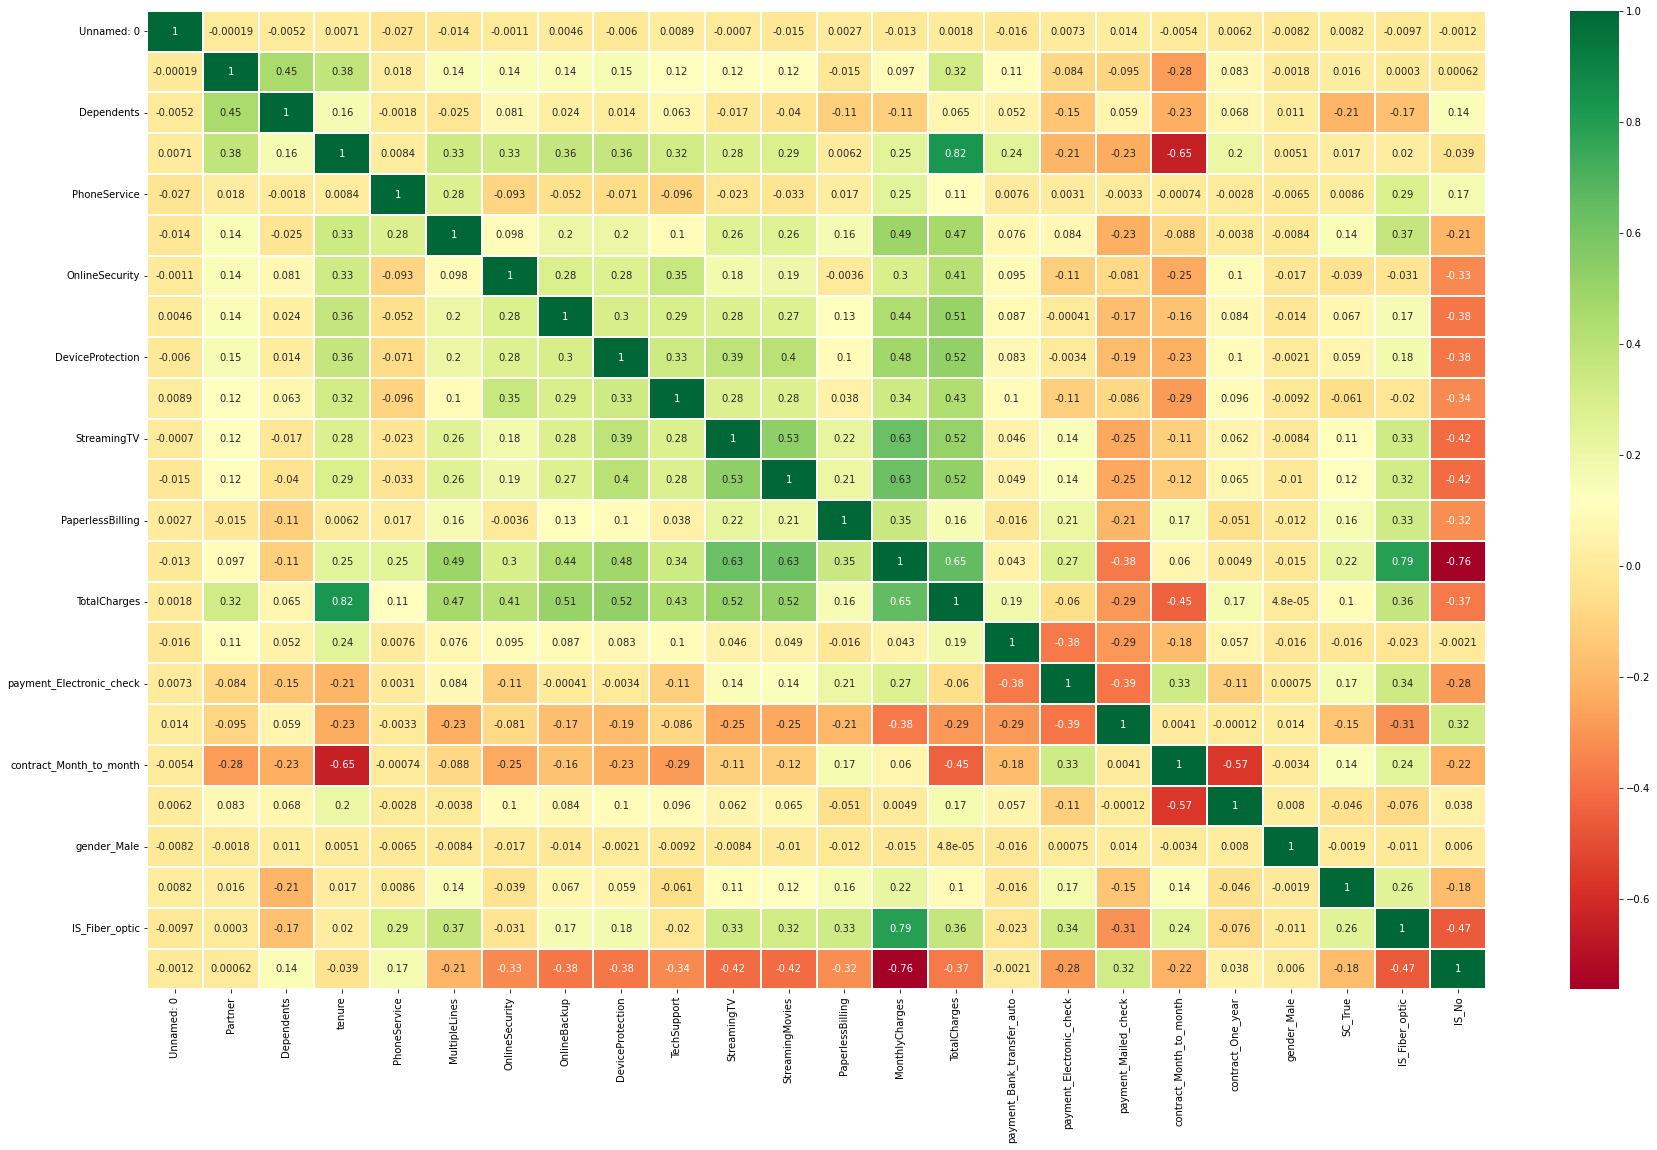

In [13]:
modelData=pd.read_csv('modelData.csv')



modelData[modelData==np.inf]=np.nan
modelData.fillna(modelData.mean(), inplace=True)

sns.heatmap(modelData.loc[:,modelData.columns != 'Churn'].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,18)
plt.show()


#### Here we dropped the attributes which are heavily co related

In [14]:
modelData.drop(['IS_No','tenure'], axis=1, inplace=True)
x=np.asarray(modelData.loc[:,modelData.columns != 'Churn'])
y=np.asarray(modelData['Churn'])
print(x[:2])
print(y[:2])

[[0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  2.9850e+01 2.9850e+01 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  5.6950e+01 1.8895e+03 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00]]
[0 0]


#### Here we'll normalize our data by using sklearn's StandardScaler

In [ ]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:2]

#### It is recommended practice of splitting data in training and testing before using it in model, in our case we are keeping 80/20 data for training and testing respectively.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=72)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 22) (5634,)
Test set: (1409, 22) (1409,)


#### Before fitting data to our model, feature selection is very essential part of model development.
#### Here we are using sklearn's RandomForestClassifier with ensemble learning to choose most relevent features for our model. It will iteratively select most relevent features and eliminate least relevent features and threshold will be median for feature selection.

In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=37), threshold='median')
select.fit(X_train, y_train)
X_train_s = select.transform(X_train)

print('The shape of x_train: ',X_train.shape)
print('The shape of x_train_s: ',X_train_s.shape)

The shape of x_train:  (5634, 22)
The shape of x_train_s:  (5634, 11)


#### As we can see in above feature selection process, we got 11 most relevent features out of 29 from our training data.
#### We can see here black colored area shows all those features are relevent and selected.

Text(0.5, 0, 'Index of features')

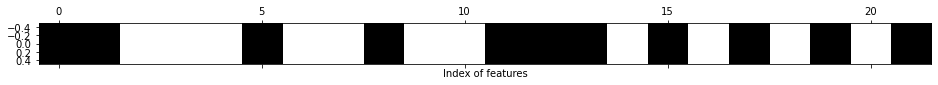

In [18]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of features')

#### We're fitting our training data to LogicalRegression and making prediction on our test data.
#### Accuracy of our model is around 79%, and that means 79/100 times we can make correct prediction.

In [19]:
X_test_s = select.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
score = lr.fit(X_train_s,y_train).score(X_test_s, y_test)
print('The score of Logistic Regerssion for customer churn: {:.3f}'.format(score))

The score of Logistic Regerssion for customer churn: 0.791


#### Here we tested it on SVM.

In [20]:
X_test_s = select.transform(X_test)

from sklearn import svm
clf = svm.SVC()
score = clf.fit(X_train_s,y_train).score(X_test_s, y_test)
print('The score of SVM for customer churn: {:.3f}'.format(score))

The score of SVM for customer churn: 0.786


#### Here we tested it on Random Forest algorithm.

In [1]:
X_test_s = select.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
score = rfc.fit(X_train_s,y_train).score(X_test_s, y_test)
print('The score of RFC for customer churn: {:.3f}'.format(score))

NameError: name 'select' is not defined

In [2]:
import pickle
with open('CustomerExperiencePrediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)

NameError: name 'lr_clf' is not defined